In [1]:
# fait par : yasmine el mkhantar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")  # Remplace par le bon chemin si nécessaire

print(df.head())

print(df.info())

print(df.isnull().sum())

# Encodage de la variable 'Genre' (Male/Female → 0/1)
df['Genre'] = df['Gender'].map({'Male': 0, 'Female': 1})

   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                  15                      39
1           2    Male  21.0                  15                      81
2           3  Female  20.0                  16                       6
3           4  Female  23.0                  16                      77
4           5  Female  31.0                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     195 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB
None
CustomerID                

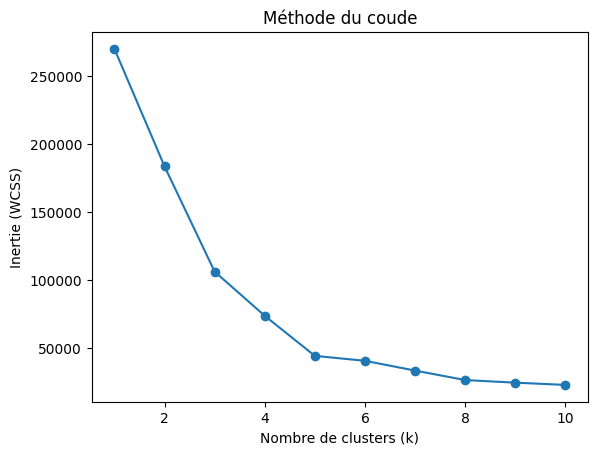

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Bien écrire les noms des colonnes
x = df[["Annual Income (k$)", "Spending Score (1-100)"]]

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.ylabel("Inertie (WCSS)")
plt.xlabel("Nombre de clusters (k)")
plt.title("Méthode du coude")
plt.show()


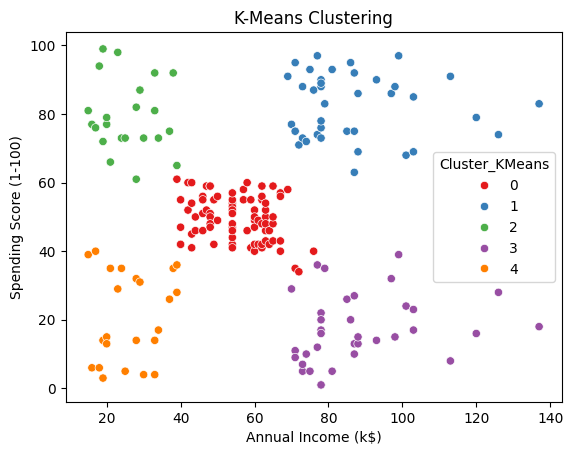

In [3]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Clustering avec KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)

# Ajouter les clusters au DataFrame
df["Cluster_KMeans"] = kmeans.labels_

# Affichage
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_KMeans', data=df, palette='Set1')
plt.title("K-Means Clustering")
plt.show()


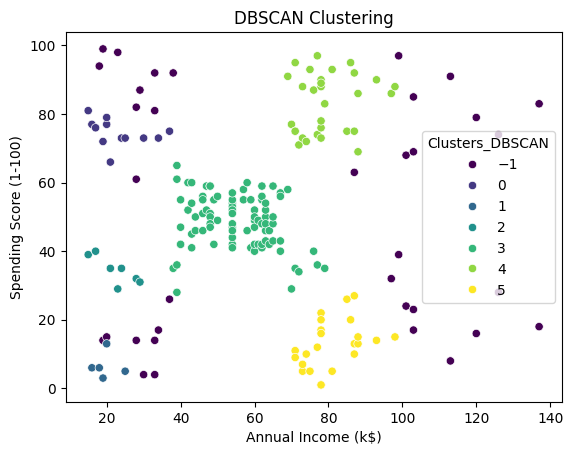

In [4]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Appliquer DBSCAN
#eps : la distance maximale entre deux points pour les considérer comme voisins

#min_samples : nombre minimal de points dans une zone pour qu’elle soit considérée comme un cluster
dbscan = DBSCAN(eps=8, min_samples=5)
df["Clusters_DBSCAN"] = dbscan.fit_predict(x)  
# Visualisation
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", 
                hue="Clusters_DBSCAN", data=df, palette="viridis")
plt.title("DBSCAN Clustering")
plt.show()

In [5]:
#K-Means permet de regrouper les données en clusters mais ne détecte pas 
#les anomalies, car chaque point doit appartenir à un groupe. En revanche, 
#DBSCAN identifie les zones de faible densité comme des anomalies et leur 
#attribue le label -1, ce qui en fait un algorithme adapté à la détection 
#d’éléments isolés.